# TP2

## Importation des packages

In [61]:
import numpy as np
from numpy.fft import fft, ifft
import matplotlib.pyplot as plt
import time
import scipy.io.wavfile as audio
from scipy.signal import resample

## Exercice 1 (Prise en Main)

### 1- Définir un signal u pour N = 1024

In [62]:
N = 1024
u = np.random.rand(N)

### 2- Calculer u_chap et afficher son spectre d'amplitude

In [63]:
u_chap = fft(u)

In [64]:
u_chap_abs = np.abs(u_chap) # spectre d'amplitude
print(u_chap_abs)

[501.13819001   5.76516434   5.74006088 ...   7.61720016   5.74006088
   5.76516434]


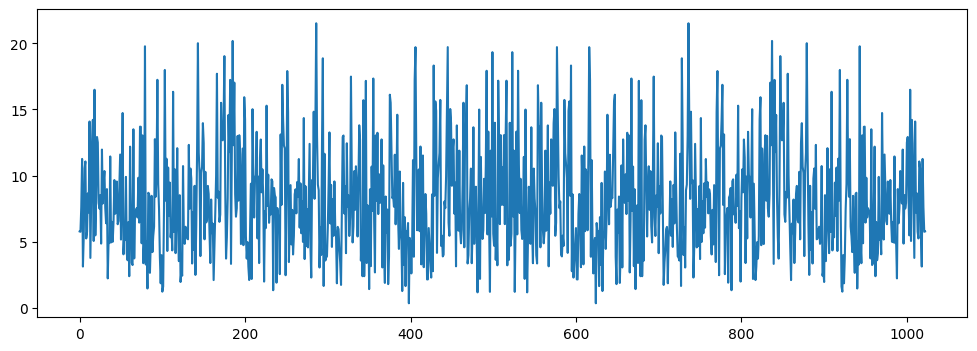

In [65]:
plt.figure(figsize=(12,4), dpi=100)
plt.plot(u_chap_abs[1:]);

### 3- Définir une sinusoïde v et calculer son spectre d'amplitude

In [66]:
# Création d'un signal sinusoïdal
temps = np.linspace(0, 1, N)
frequence = 5  # Fréquence en Hz
v = np.sin(2 * np.pi * frequence * temps)
v_chap = fft(v)
v_chap_abs = np.abs(v_chap)

In [67]:
# v = np.sin(u*2*np.pi/N)
# v_chap = fft(v)
# v_chap_abs = np.absolute(v_chap)

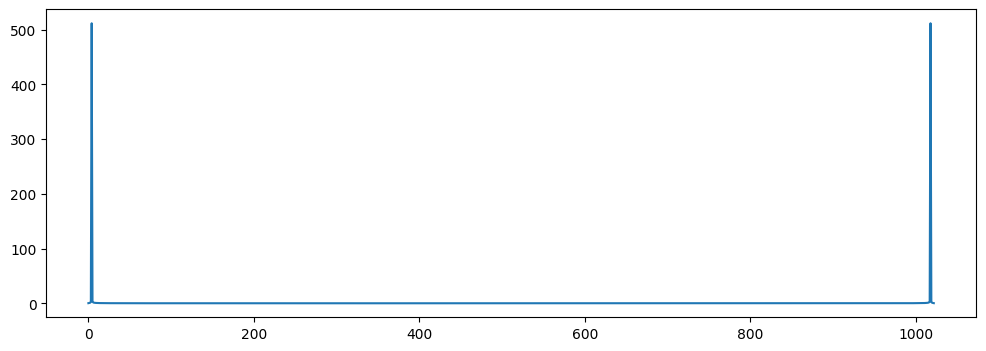

In [68]:
plt.figure(figsize=(12,4), dpi=100)
plt.plot(v_chap_abs[1:]);
# plt.plot(np.imag(v_chap_abs[1:]));
# plt.plot(np.real(v_chap_abs[1:]));

### 4- Construire la matrice F de la TF et comparer le résultat avec le fft

In [69]:
def Four1(N):
    ind = np.multiply.outer(range(N), range(N))
    Four = np.exp(-2*np.pi*1j*ind/N)
    return Four

In [70]:
def Four2(N):
    F = np.zeros((N, N), dtype=np.complex128)
    for k in range(N):
        for n in range(N):
            F[k, n] = np.exp(-2j*np.pi*k*n/N)
    return F

In [71]:
# Calculer la transformée de Fourier manuellement
debut = time.time()
tf_mat = np.dot(Four1(N), v)
temps_tf_mat = time.time() - debut

# Calculer la transformée de Fourier avec la fonction fft
debut = time.time()
tf_fft = fft(v)
temps_fft = time.time() - debut

### 5- Comparer la norme de u_chap et de u

In [72]:
norme_u_car = np.linalg.norm(v)**2 
norme_tf_u = np.linalg.norm(tf_mat)
norme_u_2_car = (1/N) * (norme_tf_u**2) # Théorème de Parseval

In [73]:
norme_u_car

511.5

In [74]:
norme_u_2_car

511.49999999999807

### 6- Générer un dirac et afficher le signal

In [75]:
# Générer le signal u2 = δ41
u2 = np.zeros(N)
u2[41] = 1

# Calculer la transformée de Fourier discrète (DFT) de u2
tf_u2 = np.fft.fft(u2)

# Séparer la partie réelle et imaginaire de la DFT sur les N/2 premières fréquences
re_tf_u2 = tf_u2[:N//2].real
im_tf_u2 = tf_u2[:N//2].imag

In [76]:
# Calculer le spectre d'amplitude de u2
sp_amp = np.abs(tf_u2[:N//2])

# Calculer le spectre de phase de u2 (argument de la DFT)
sp_ph = np.angle(tf_u2[:N//2])

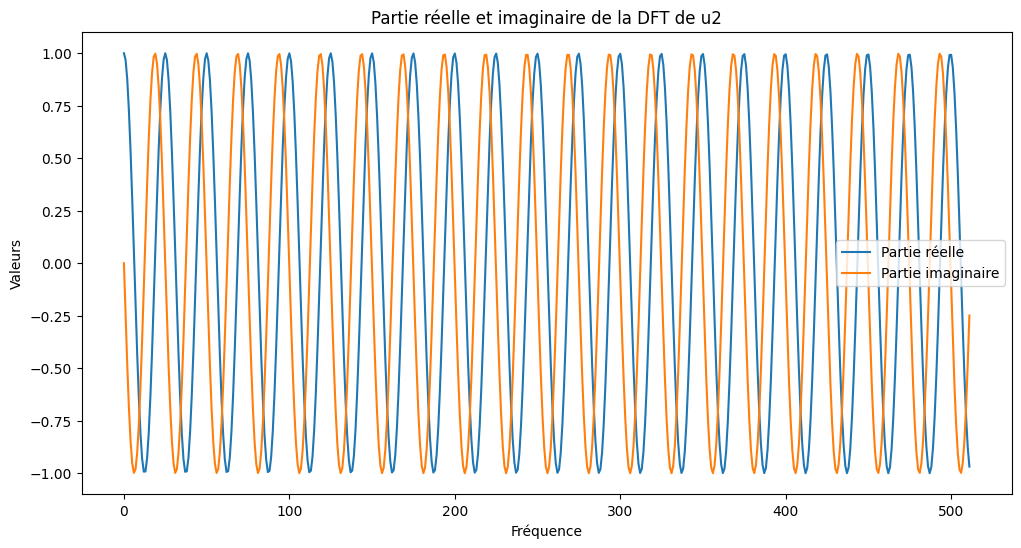

In [77]:
# Afficher la partie réelle et imaginaire de la DFT
plt.figure(figsize=(12, 6))
plt.plot(re_tf_u2, label='Partie réelle')
plt.plot(im_tf_u2, label='Partie imaginaire')
plt.title("Partie réelle et imaginaire de la DFT de u2")
plt.xlabel("Fréquence")
plt.ylabel("Valeurs")
plt.legend();

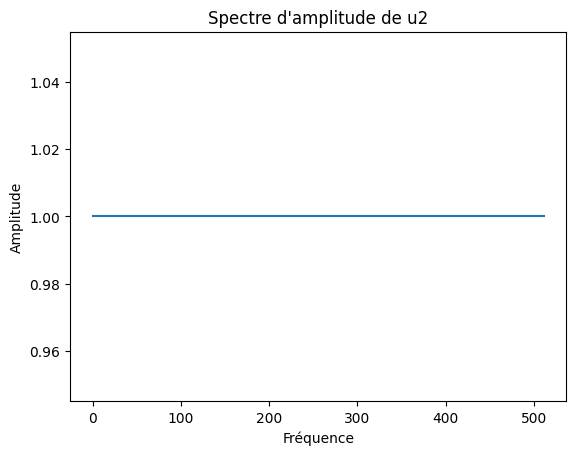

In [78]:
# Afficher le spectre d'amplitude
plt.plot(sp_amp)
plt.title("Spectre d'amplitude de u2")
plt.xlabel("Fréquence")
plt.ylabel("Amplitude")
plt.show();

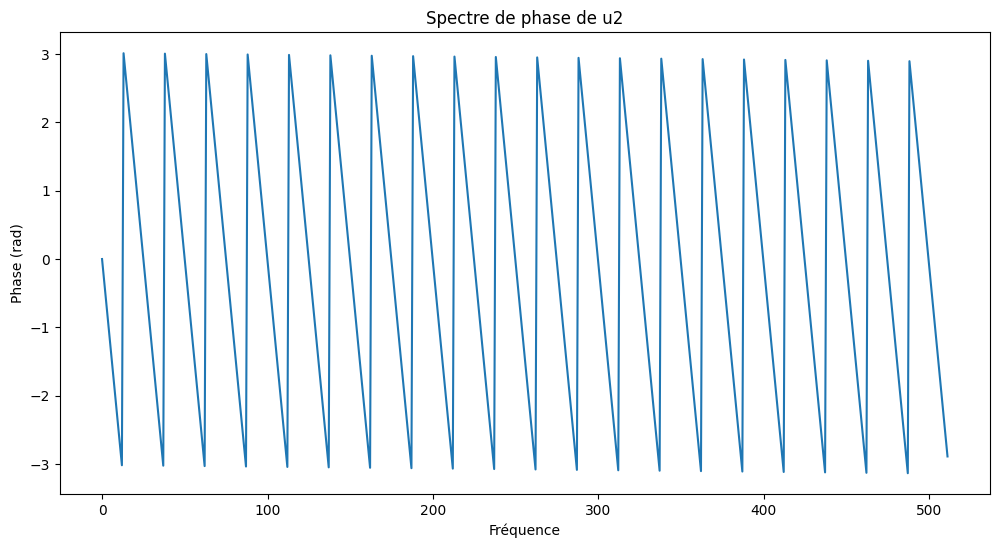

In [79]:
# Afficher le spectre de phase
plt.figure(figsize=(12, 6))
plt.plot(sp_ph)
plt.title("Spectre de phase de u2")
plt.xlabel("Fréquence")
plt.ylabel("Phase (rad)")
plt.show();

## Exercice 2 (Modélisation et filtrage dans l’espace de Fourier)

### 1- Définir, afficher et enregistrer les signaux

In [80]:
# Fréquence d'échantillonnage
fs = 44100  # Hz

# Intervalle de temps entre deux échantillons
tau = 1 / fs

# Nombre total d'échantillons

N = 44100  # correspond à une seconde d'enregistrement à 44.1 kHz

# Temps d'échantillonnage

temps = np.arange(N) * tau

# Fréquences des notes
fdo = 261.63  # Hz
fmi = 1.25 * fdo
fsol = 1.5 * fdo

# Définition des signaux individuels
u1 = 0.05 * np.cos(2 * np.pi * fdo * temps)
u2 = 0.03 * np.sin(2 * np.pi * fmi * temps)
u3 = 0.02 * np.cos(2 * np.pi * fsol * temps)

# Signal combiné
u123 = u1 + u2 + u3

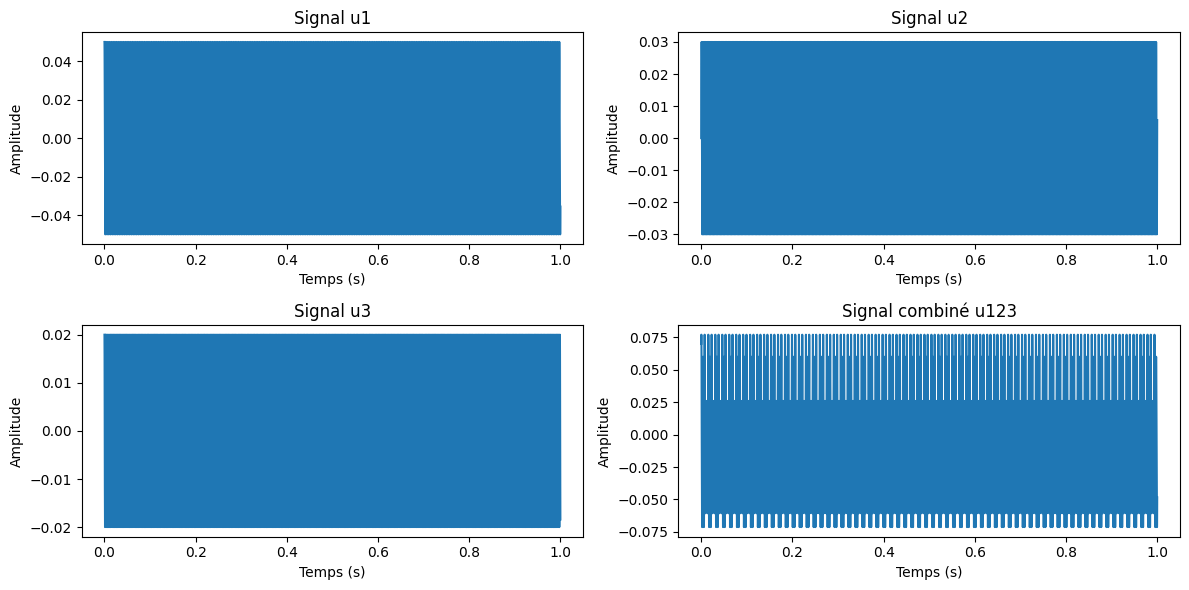

In [81]:
# Afficher les signaux générés
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(temps, u1)
plt.title("Signal u1")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")

plt.subplot(2, 2, 2)
plt.plot(temps, u2)
plt.title("Signal u2")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")

plt.subplot(2, 2, 3)
plt.plot(temps, u3)
plt.title("Signal u3")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")

plt.subplot(2, 2, 4)
plt.plot(temps, u123)
plt.title("Signal combiné u123")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()

In [82]:
# Enregistrer les signaux dans des fichiers WAV
audio.write("u1.wav", fs, u1)
audio.write("u2.wav", fs, u2)
audio.write("u3.wav", fs, u3)
audio.write("u123.wav", fs, u123)

In [83]:
# # Fréquence d'échantillonnage pour le fichier WAV
# f_s_wav = 44100

# # Normaliser les signaux pour une amplitude maximale de 1
# u1_normalized = u1 / np.max(np.abs(u1))
# u2_normalized = u2 / np.max(np.abs(u2))
# u3_normalized = u3 / np.max(np.abs(u3))
# u123_normalized = u123 / np.max(np.abs(u123))

# # Enregistrer les signaux dans des fichiers WAV
# audio.write("u1.wav", f_s_wav, u1_normalized)
# audio.write("u2.wav", f_s_wav, u2_normalized)
# audio.write("u3.wav", f_s_wav, u3_normalized)
# audio.write("u123.wav", f_s_wav, u123_normalized)

### 2- Afficher le spectre d’amplitude de u1 sur les N/2 premières fréquences.

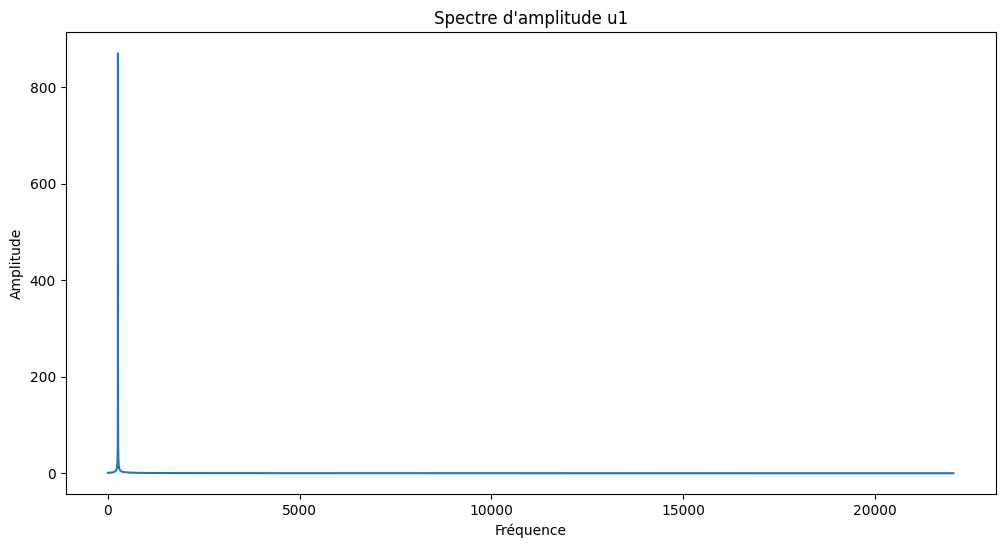

In [84]:
tf_u1 = fft(u1)

freqs = np.fft.fftfreq(N, tau)

sp_amp_u1 = np.abs(tf_u1[:N//2])

plt.figure(figsize=(12, 6))
plt.plot(freqs[:N//2], sp_amp_u1)
plt.title("Spectre d'amplitude u1")
plt.xlabel("Fréquence")
plt.ylabel("Amplitude");

### 3- Calculer l’indice où |u1_chap| est maximum. Comparer avec 𝑁𝜏𝑓do.

In [85]:
ind_max = np.argmax(sp_amp_u1)

freq_max = freqs[ind_max]

N_tau_fdo = N * tau * fdo

In [86]:
freq_max

262.0

In [87]:
N_tau_fdo

261.63

### 4- Lecture et affichage des signaux

In [88]:
# fs_1,do = audio.read('TP1/audio/do.wav')
# fs_2,mi = audio.read('TP1/audio/mi.wav')
# fs_3,sol = audio.read('TP1/audio/sol.wav')
# fs_4,do2 = audio.read('TP1/audio/do2.wav')
# fs_5,domisol = audio.read('TP1/audio/domisol.wav')

In [89]:
# Liste des noms de fichiers
noms_fichiers = ["do.wav", "mi.wav", "sol.wav", "do2.wav", "domisol.wav"]

# Taille commune pour tous les signaux
N = 500000

# Initialiser une liste pour stocker les signaux
signaux = []

# Lire les signaux à partir des fichiers WAV et ajuster leur taille
for nom_fichier in noms_fichiers:
    # Lire le fichier WAV
    freq, signal_audio = audio.read('audio/' + nom_fichier)
    
    # Vérifier la longueur du signal
    len_signal = len(signal_audio)
    
    # Créer un signal rempli de zéros de taille N pour chaque canal
    signal = np.zeros((N, 2), dtype=signal_audio.dtype)
    
    # Copier les données audio dans le signal rempli de zéros
    signal[:len_signal, :] = signal_audio
    
    # Ajouter le signal à la liste
    signaux.append(signal)

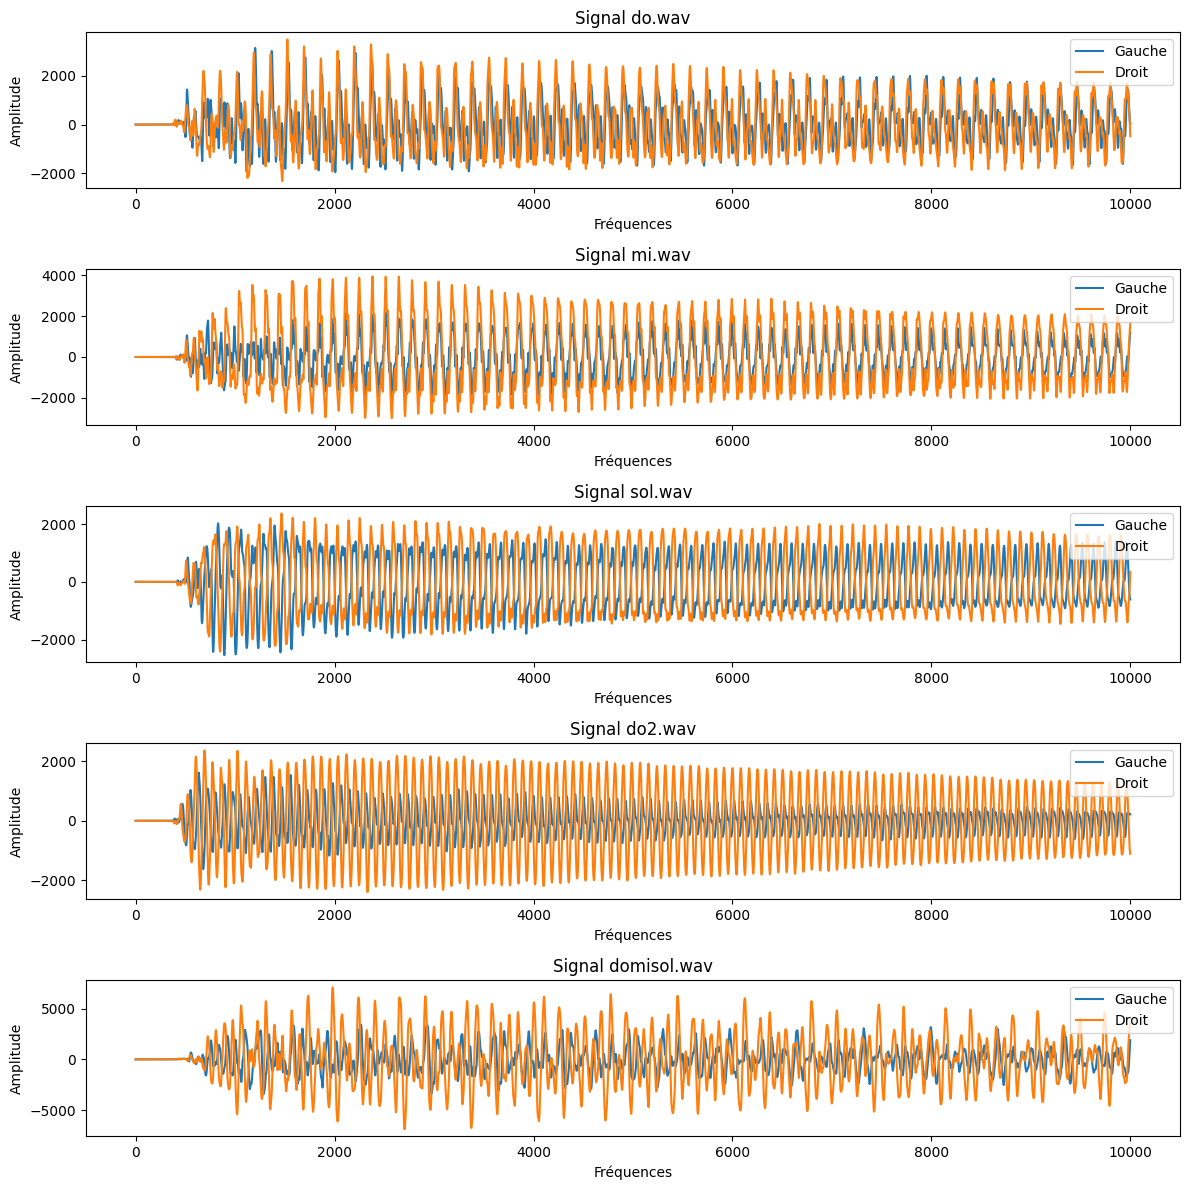

In [90]:
# Afficher une partie des signaux
plt.figure(figsize=(12, 12))
for i, signal in enumerate(signaux):
    plt.subplot(len(signaux), 1, i+1)
    plt.plot(signal[:10000, 0])  # Afficher les premières 10000 échantillons du canal gauche
    plt.plot(signal[:10000, 1])  # Afficher les premières 10000 échantillons du canal droit
    plt.title("Signal " + noms_fichiers[i])
    plt.xlabel("Fréquences")
    plt.ylabel("Amplitude")
    plt.legend(['Gauche', 'Droit'], loc='upper right')
plt.tight_layout()
plt.show()

### Calcul et affichage des spectres d’amplitude des signaux do, mi, sol

In [91]:
# Initialiser une liste pour stocker les magnitudes des spectres d'amplitude
sp_amps = []

# Calculer les spectres d'amplitude pour chaque fichier audio

for signal in signaux[:3]:
    
    # Calculer la transformée de Fourier
    tfd = np.fft.fft(signal)
    
    # Calculer le spectre d'amplitude
    sp_amp = np.abs(tfd)
    
    # Ajouter le spectre d'amplitude à la liste
    sp_amps.append(sp_amp)

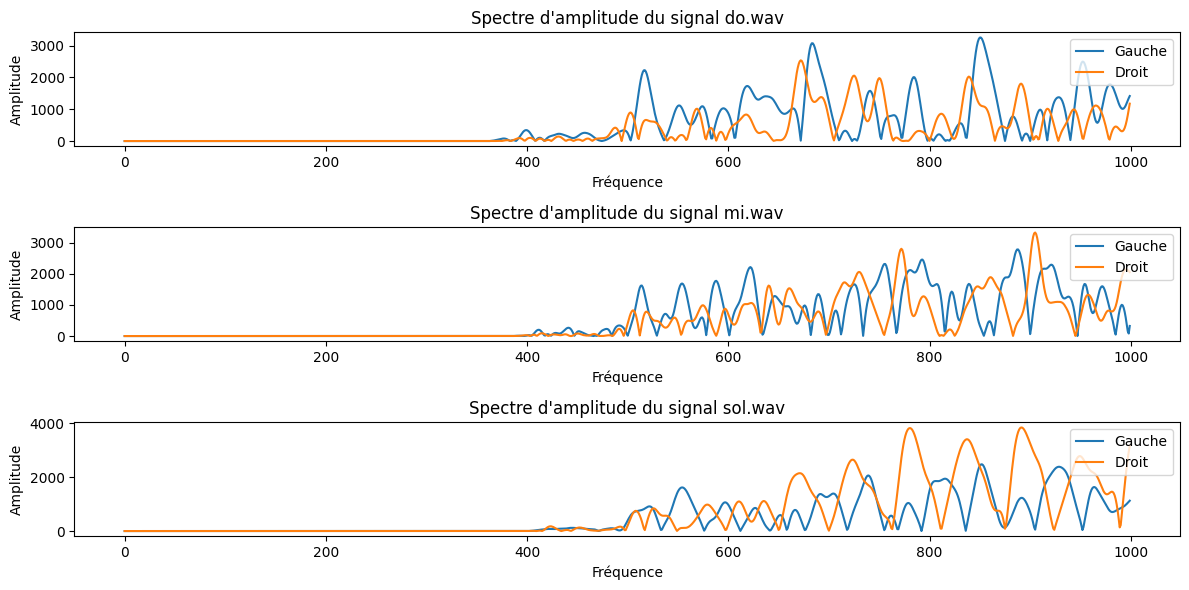

In [92]:
# Afficher les spectres d'amplitude
plt.figure(figsize=(12, 6))
for i, sp_amp in enumerate(sp_amps):
    plt.subplot(len(sp_amps), 1, i+1)
    plt.plot(sp_amp[:1000, 0]) # Afficher les premières 10000 échantillons du canal gauche
    plt.plot(sp_amp[:1000, 1]) # Afficher les premières 10000 échantillons du canal droit
    plt.title("Spectre d'amplitude du signal " + noms_fichiers[i])
    plt.xlabel("Fréquence")
    plt.ylabel("Amplitude")
    plt.legend(['Gauche', 'Droit'], loc='upper right')
plt.tight_layout()
plt.show()

## 5- Proposition d'amélioration de la modélisation du son de piano

In [93]:
# Créer le signal pour un do avec ses composantes harmoniques
u1 = 0.05 * np.cos(2 * np.pi * fdo * temps)
u1 += 0.02 * np.cos(2 * np.pi * 2 * fdo * temps)  # Deuxième harmonique
u1 += 0.01 * np.cos(2 * np.pi * 3 * fdo * temps)  # Troisième harmonique

# Créer le signal pour un mi avec ses composantes harmoniques
u2 = 0.03 * np.sin(2 * np.pi * fmi * temps)
u2 += 0.015 * np.sin(2 * np.pi * 2 * fmi * temps)  # Deuxième harmonique
u2 += 0.0075 * np.sin(2 * np.pi * 3 * fmi * temps)  # Troisième harmonique

# Créer le signal pour un sol avec ses composantes harmoniques
u3 = 0.02 * np.cos(2 * np.pi * fsol * temps)
u3 += 0.01 * np.cos(2 * np.pi * 2 * fsol * temps)  # Deuxième harmonique
u3 += 0.005 * np.cos(2 * np.pi * 3 * fsol * temps)  # Troisième harmonique

# Somme des signaux pour former un accord de do majeur
u123 = u1 + u2 + u3

In [94]:
# Enregistrer les signaux dans des fichiers WAV
audio.write("do_harmonic.wav", fs, u1)
audio.write("mi_harmonic.wav", fs, u2)
audio.write("sol_harmonic.wav", fs, u3)
audio.write("do_major_chord_harmonic.wav", fs, u123)

In [95]:
# Normaliser les signaux pour éviter le clipping lors de l'écriture du fichier audio
u1 /= np.max(np.abs(u1))
u2 /= np.max(np.abs(u2))
u3 /= np.max(np.abs(u3))
u123 /= np.max(np.abs(u123))
               
# Enregistrer les signaux dans des fichiers WAV
audio.write("do_harmonic.wav", fs, np.int16(u1 * 32767))
audio.write("mi_harmonic.wav", fs, np.int16(u2 * 32767))
audio.write("sol_harmonic.wav", fs, np.int16(u3 * 32767))
audio.write("do_major_chord_harmonic.wav", fs, np.int16(u123 * 32767))

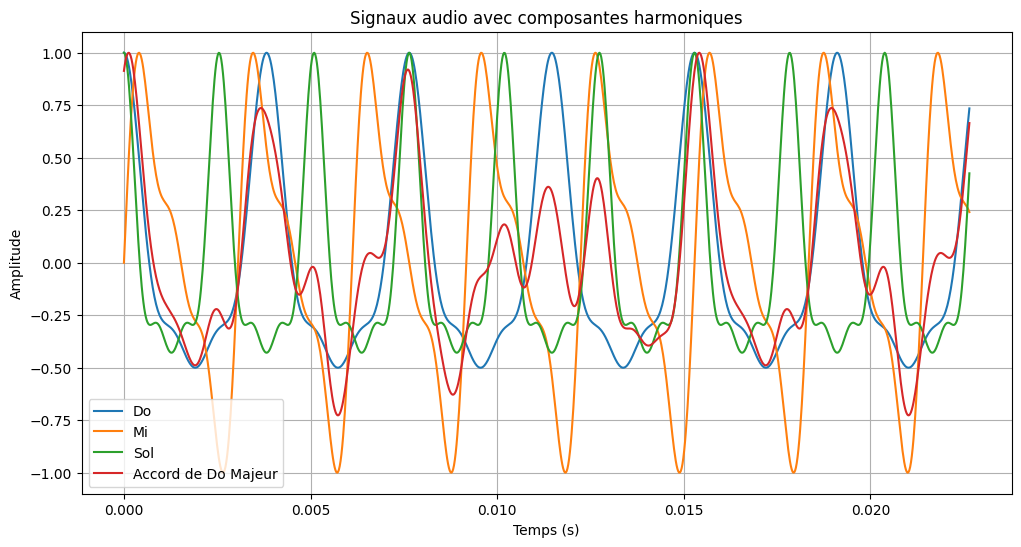

In [96]:
# Afficher une partie des signaux
plt.figure(figsize=(12, 6))
plt.plot(temps[:1000], u1[:1000], label='Do')
plt.plot(temps[:1000], u2[:1000], label='Mi')
plt.plot(temps[:1000], u3[:1000], label='Sol')
plt.plot(temps[:1000], u123[:1000], label='Accord de Do Majeur')
plt.title("Signaux audio avec composantes harmoniques")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()